In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json
%matplotlib inline
import scipy

In [3]:
# form a global BBV out of all the cores

def form_dataframe(dirpath:Path):
    index = 0
    df = pd.DataFrame()
    path = Path(dirpath / f"lpinfo{index}.json")
    while path.is_file():
        global_bbv = {}
        bbinst = {}
        global_inst = 0
        with open(path.as_posix()) as file:
            data = json.load(file)
            bbinst = data["global BBinst profile"]
            global_inst = data["global inst"]
            for key, value in data.items():
                if "core" in key:
                    for pc, freq in value["BBfreq"].items():
                        if pc in global_bbv:
                            global_bbv[pc] += freq
                        else:
                            global_bbv[pc] = freq
        weighted_global_bbv = {}
        for key, value in global_bbv.items():
            inst = bbinst[key]
            weighted_global_bbv[key] = ((float(value) * float(inst)))/float(global_inst)

        df = df.append(weighted_global_bbv,ignore_index=True)
        index += 1
        path = Path(dirpath / f"lpinfo{index}.json")
    df = df.replace(np.nan,0)
    return df

df = form_dataframe(Path("/home/studyztp/test_ground/looppoint_analysis/plot/test-plot-bbv"))



/tmp/ipykernel_100179/1616311991.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(weighted_global_bbv,ignore_index=True)
/tmp/ipykernel_100179/1616311991.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(weighted_global_bbv,ignore_index=True)
/tmp/ipykernel_100179/1616311991.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(weighted_global_bbv,ignore_index=True)
/tmp/ipykernel_100179/1616311991.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(weighted_global_bbv,ignore_index=True)
/tmp/ipykernel_100179/1616311991.py:27: FutureWarning: The frame.append method is de

In [4]:
df.to_csv("bbvinfo.csv")
df

,4247821,4257524,4257033,4257501,4256927,4256713,4275472,4256664,4256502,4256477,...,4287891,4287915,4287952,4287966,4288000,4288022,4200084,4200153,4200171,4200179
0,2.099999e-07,0.000036,0.010033,0.000717,0.013186,0.000041,0.001319,0.000050,0.001128,0.001411,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,1.320000e-07,0.000025,0.006919,0.000494,0.009094,0.000028,0.001934,0.000035,0.000778,0.000973,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001934,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
3,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001502,0.000000,0.000000,0.000000,...,4.959999e-07,7.999998e-08,7.999998e-09,1.600000e-08,5.999999e-09,3.999999e-09,0.0,0.0,0.0,0.0
4,2.699998e-07,0.000047,0.013027,0.000931,0.017122,0.000053,0.001714,0.000065,0.001466,0.001832,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2.219994e-07,0.000038,0.010561,0.000754,0.013880,0.000043,0.001934,0.000053,0.001187,0.001484,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
370,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001934,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
371,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001932,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
372,1.799998e-07,0.000034,0.009389,0.000671,0.012340,0.000038,0.001283,0.000047,0.001056,0.001320,...,4.959995e-07,7.999992e-08,7.999992e-09,1.599998e-08,5.999994e-09,3.999996e-09,0.0,0.0,0.0,0.0


In [5]:
nparr = df.to_numpy()
nparr

array([[2.09999903e-07, 3.63999832e-05, 1.00325354e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31999972e-07, 2.51039946e-05, 6.91949852e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79999809e-07, 3.40639638e-05, 9.38881003e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61999535e-07, 2.74399212e-05, 7.56319829e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

[0.81447652 1.20693761 0.79967782 ... 1.20824282 0.83884189 0.79923332]


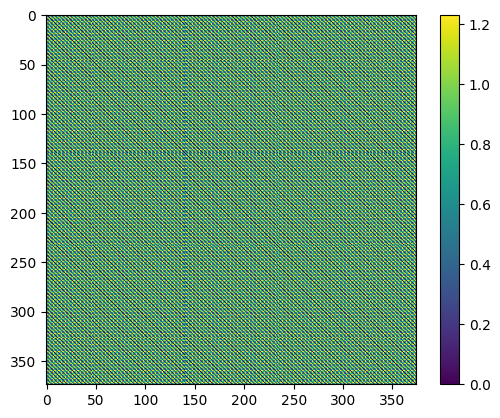

In [6]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(nparr, metric='cityblock')
dist_matrix = squareform(distances)
print(distances)
plt.imshow(dist_matrix, interpolation='none')
plt.colorbar()
plt.show()

In [7]:
def manhattan_dist(arr1, arr2):
    sum = 0
    for iter1, iter2 in zip(arr1,arr2):
        sum += abs(iter1 - iter2)
    return sum

<AxesSubplot:>

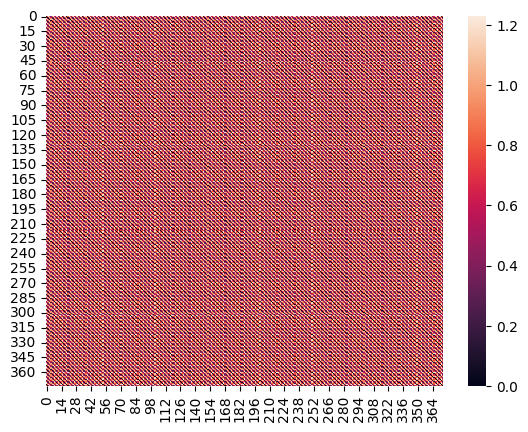

In [8]:
mandis = []
for row1 in nparr:
    rowdis = []
    for row2 in nparr:
        rowdis.append(manhattan_dist(row1,row2))
    mandis.append(rowdis)
npmandist=np.array(mandis)
sns.heatmap(npmandist)

In [10]:
npmandist.shape

(374, 374)